In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
import brfss
df = brfss.ReadBrfss()

In [3]:
df.describe()

,age,sex,wtyrago,finalwt,wtkg2,htm3
count,410856.000000,414509.000000,390399.000000,414509.000000,398484.000000,409129.000000
mean,54.862180,1.624368,79.721319,561.774700,78.992453,168.825190
std,16.737702,0.484286,20.565164,1076.538764,19.546157,10.352653
min,18.000000,1.000000,22.727273,1.695143,20.000000,61.000000
25%,43.000000,1.000000,64.545455,97.006804,64.550000,160.000000
50%,55.000000,2.000000,77.272727,234.010543,77.270000,168.000000
75%,67.000000,2.000000,90.909091,590.775576,90.910000,175.000000
max,99.000000,2.000000,342.272727,60995.111700,309.090000,236.000000


In [4]:
df.isnull().sum()

age         3653
sex            0
wtyrago    24110
finalwt        0
wtkg2      16025
htm3        5380
dtype: int64

In [5]:
heights = df.htm3.dropna()

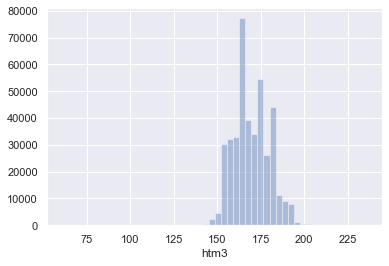

In [6]:
sns.distplot(heights,kde=False)

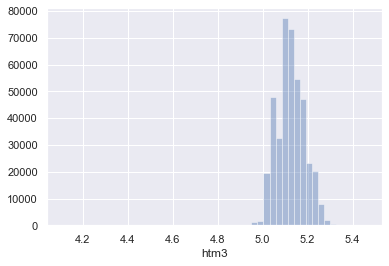

In [7]:
sns.distplot(np.log(heights),kde=False)

Exercise 1   In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use scipy.stats.norm.cdf. 

In [8]:
mu = 178
sigma = 7.7
low_cm = ((5*12)+10)*2.54
high_cm = ((6*12) + 1)*2.54
high_cm

185.42000000000002

In [9]:
from scipy import stats

In [10]:
low_range = stats.norm.cdf(low_cm,loc=mu,scale=sigma)

In [11]:
high_range = stats.norm.cdf(high_cm,loc=mu,scale=sigma)

In [12]:
solution = high_range - low_range
solution

0.34274683763147457

Exercise 2   To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be? 

In [13]:
import thinkstats2
import thinkplot

In [14]:
alpha = 1.7
xmin = 1

dist = stats.pareto(b=alpha,scale=xmin)
dist.mean()  # the average height

2.428571428571429

In [15]:
# compared to the median height
dist.median()

1.5034066538560549

In [16]:
#percentage of below median height
dist.cdf(dist.mean())

0.778739697565288

In [17]:
# of 7 billion, how many people would be taller than 1 km?
(1 - dist.cdf(1000))*7e9

55602.976430479954

In [18]:
# how tall do we expect the tallest person to be?
# solve for cdf = 1 (the hard way)
(1-dist.cdf(619000))*7e9

0.9982142890052614

In [19]:
# the easy way
# PPF = Percent Point Function is the inverse of the CDF
dist.ppf(1-(1/7e9))

618349.6106759505

Exercise 4   For small values of n, we don’t expect an empirical distribution to fit an analytic distribution exactly. One way to evaluate the quality of fit is to generate a sample from an analytic distribution and see how well it matches the data.

For example, in Section 5.1 we plotted the distribution of time between births and saw that it is approximately exponential. But the distribution is based on only 44 data points. To see whether the data might have come from an exponential distribution, generate 44 values from an exponential distribution with the same mean as the data, about 33 minutes between births.

Plot the distribution of the random values and compare it to the actual distribution. You can use random.expovariate to generate the values.

In [20]:
import random

In [21]:
lam = 44/24/60 # pregnancies per minute
sample = [random.expovariate(lam) for x in range(1,45)]
(1/lam, np.mean(sample)) # actual pregnancies per minute v. our modeled distribution

(32.72727272727273, 24.524686413987716)

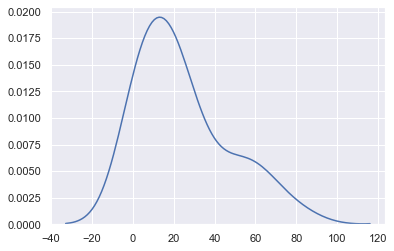

In [22]:
sns.kdeplot(sample)

In [23]:
min(sample)

0.02351690796943705

Exercise 6  

The distributions of wealth and income are sometimes modeled using lognormal and Pareto distributions. To see which is better, let’s look at some data.

The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm. I downloaded hinc06.xls, which is an Excel spreadsheet with information about household income, and converted it to hinc06.csv, a CSV file you will find in the repository for this book. You will also find hinc.py, which reads this file.

Extract the distribution of incomes from this dataset. Are any of the analytic distributions in this chapter a good model of the data? A solution to this exercise is in hinc_soln.py. 

In [27]:
import hinc

In [28]:
cps = hinc.ReadData()

In [29]:
cps.head()

,income,freq,cumsum,ps
0,4999.0,4204,4204,0.034330
1,9999.0,4729,8933,0.072947
2,14999.0,6982,15915,0.129963
3,19999.0,7157,23072,0.188407
4,24999.0,7131,30203,0.246640


In [37]:
cps = cps[cps.income!=np.inf]
income = cps.income

In [39]:
cps.describe()

,income,freq,cumsum,ps
count,41.000000,41.000000,41.000000,41.000000
mean,106096.560976,2915.780488,84548.951220,0.690432
std,62144.108682,2187.344880,34007.999712,0.277712
min,4999.000000,364.000000,4204.000000,0.034330
25%,54999.000000,1119.000000,65032.000000,0.531056
50%,104999.000000,2549.000000,98239.000000,0.802226
75%,154999.000000,4356.000000,112025.000000,0.914803
max,249999.000000,7157.000000,119547.000000,0.976229
